In [81]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
ds=pd.read_csv('labeled_data.csv')
print(ds.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [83]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [84]:
ds.shape


(24783, 7)

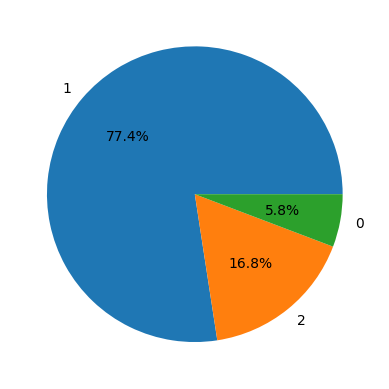

In [85]:
plt.pie(ds['class'].value_counts().values,
		labels = ds['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [86]:
ds["labels"]=ds["class"].map({0: "Hate Speech",1: "Offensive Speech",2: "No Hate or Offensive Speech"})
ds=ds[["tweet","labels"]]
print(ds.head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                        labels  
0  No Hate or Offensive Speech  
1             Offensive Speech  
2             Offensive Speech  
3             Offensive Speech  
4             Offensive Speech  


In [87]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text)
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopwords]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text
ds["tweet"] = ds["tweet"]. apply(clean)
ds.head()

,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,No Hate or Offensive Speech
1,rt mlee boy dat coldtyga dwn bad cuffin dat h...,Offensive Speech
2,rt urkindofbrand dawg rt babif ever fuck bitc...,Offensive Speech
3,rt cganderson vivabas look like tranni,Offensive Speech
4,rt shenikarobert shit hear might true might f...,Offensive Speech


In [89]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier

In [90]:
x = np. array(ds["tweet"])
y = np. array(ds["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
#Model building
model = DecisionTreeClassifier()
#Training the model
model. fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
#Testing the model
y_pred = model. predict (X_test)
y_pred

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'No Hate or Offensive Speech', 'Offensive Speech',
       'Offensive Speech'], dtype=object)

In [93]:
#Accuracy Score of our model
from sklearn. metrics import accuracy_score,confusion_matrix,precision_score
print (confusion_matrix(y_test,y_pred))

[[ 155   51  259]
 [  33 1186  160]
 [ 251  261 5823]]


In [94]:
print (accuracy_score (y_test,y_pred))

0.8759016994742633


In [101]:
#Predicting the outcome
inp = "you are an idiot"
clean(inp)
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']
